**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but unfortunately some conclusions seem to not have been saved. Could you please restore them?

# Food Sales Application

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1. Open the data file and study the general information.](#OpenData&GeneralInfo)
3. [Step 2. Carry out exploratory data analysis (EDA)](#EDA)
4. [Step 3. Build a model to predict user churn](#Model)
5. [Step 4. Create user cluster](#EventFunnel)
6. [Step 5. Come up with conclusions and basic recommendations on working with customers](#Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.                                            | 
|  **What we have**        | TOne of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.                    |
|  **Main question of project**  |  How do you know if a customer is no longer with you?                                                                            |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-analyst/courses/aaa92c32-5b7b-4eec-8a13-d1e099ee0be2/sprints/5646/topics/f9207047-1e54-4a62-ba08-0390dda7e4d5/lessons/6d5ba27b-3801-455b-94c7-96dca20f7495/)                                                                                                                                               |
| **Datasets**             | [/datasets/gym_churn_us.csv](https://code.s3.yandex.net/datasets/gym_churn_us.csv)                                                                       |

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [118]:
#!pip install scipy
#!pip install sklearn

In [119]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import plotly

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('max_colwidth', 400)

sns.set()

In [120]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
print('Anaconda version package:', sys.version)
print('Plotly version package:', plotly.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Pandas version library: 0.25.1
Numpy version library: 1.18.5
Seaborn version library: 0.9.0
Anaconda version package: 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Plotly version package: 4.1.1
The scikit-learn version is 1.0.


In [121]:
df_data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn_us.csv')

- [X] Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [122]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [123]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [124]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [125]:
get_info(df_data)

Head:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                      

None

--------------------------------------------------------------------------------------------------------------
Describe:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,Avg_additional_charges_total,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,146.943728,4.322750,1.879020,1.767052
std,96.355602,4.191297,0.972245,1.052906
min,0.148205,1.000000,0.000000,0.000000
25%,68.868830,1.000000,1.180875,0.963003
50%,136.220159,1.000000,1.832768,1.719574
75%,210.949625,6.000000,2.536078,2.510336
max,552.590740,12.000000,6.023668,6.146783


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
gender,0,0.0
Near_Location,0,0.0
Partner,0,0.0
Promo_friends,0,0.0
Phone,0,0.0
Contract_period,0,0.0
Group_visits,0,0.0
Age,0,0.0
Avg_additional_charges_total,0,0.0
Month_to_end_contract,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(4000, 14)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * In dataset no missing values and no duplicated rows.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, the data was loaded and inspected
	  
</div>

#### Step 2. Carry out exploratory data analysis (EDA) <a name="EDA"></a>

- [X] Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [126]:
df_churn = df_data.groupby(['Churn']).mean()
df_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- [X] Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [127]:
def plot_features(df, filter):
    for col in df.drop('Churn', axis = 1).columns:
        sns.set(style='dark')
        sns.set_style("whitegrid")
        plt.figure(figsize=(16,5))
        sns.distplot(df[df['Churn'] == filter][col], color='green', bins=25)
        plt.show()

Feature distributions for those who left (churn):


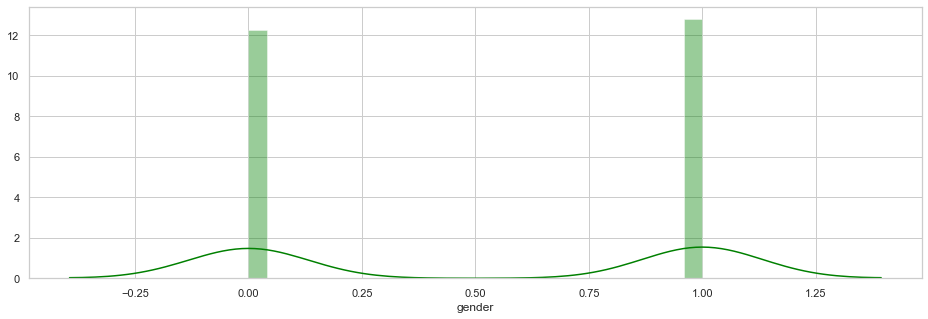

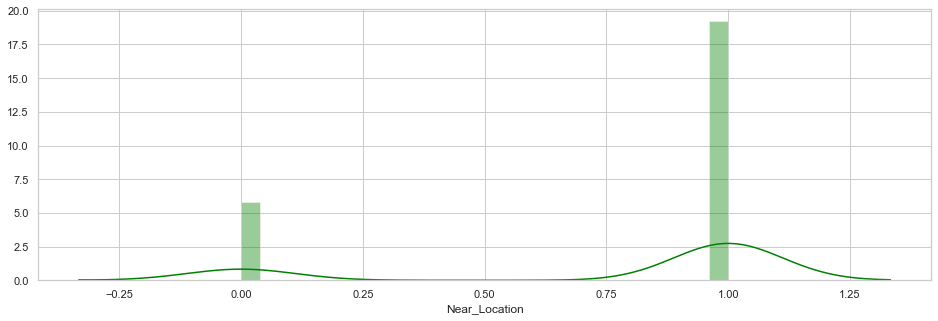

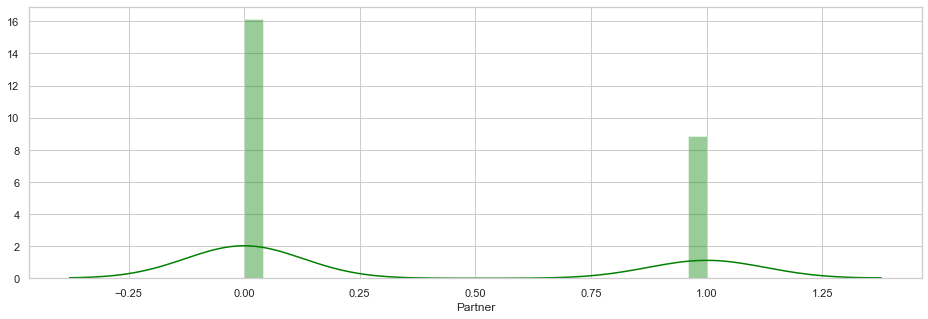

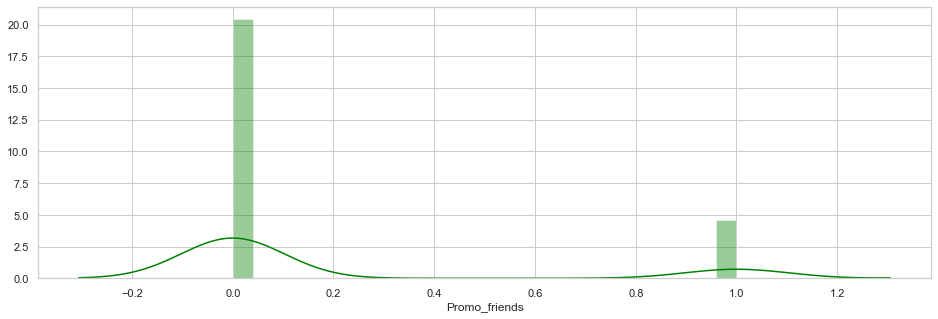

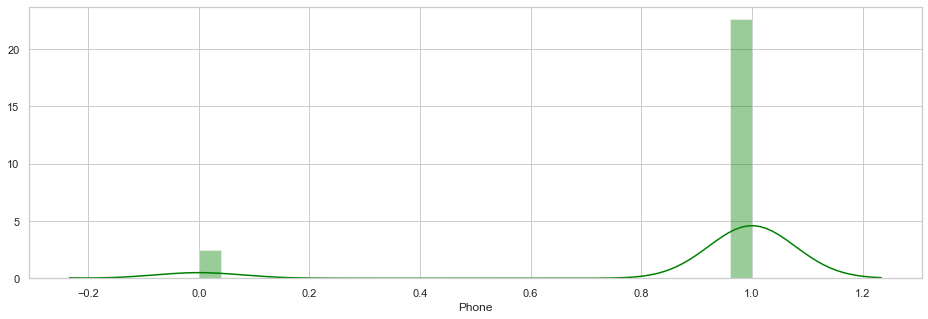

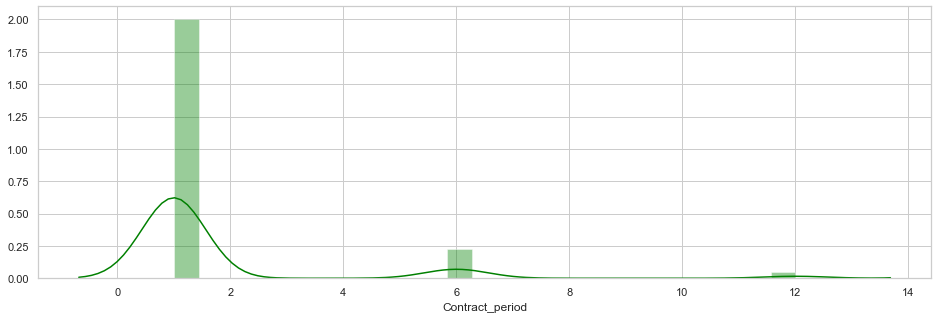

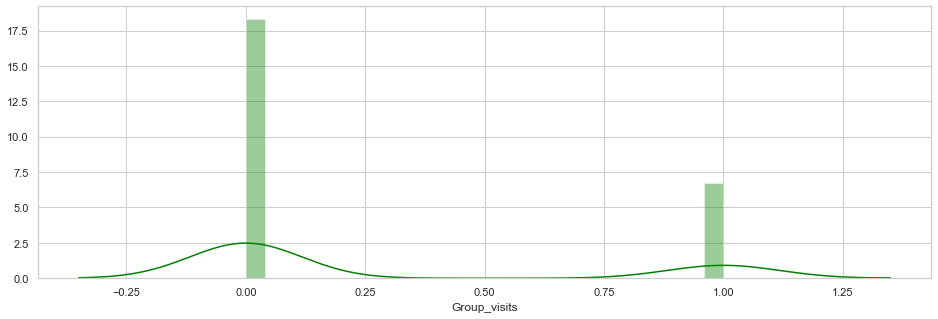

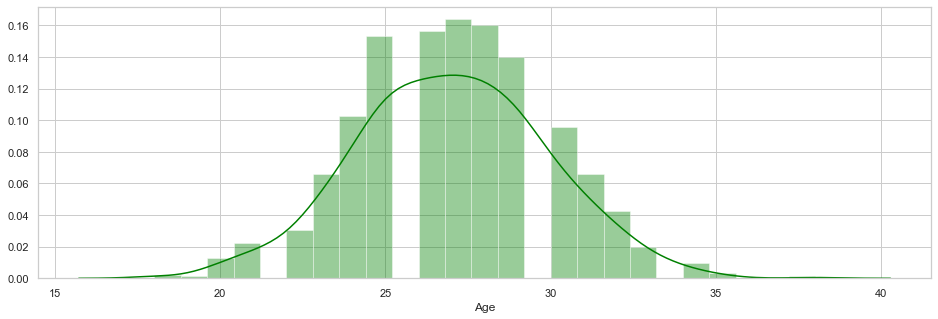

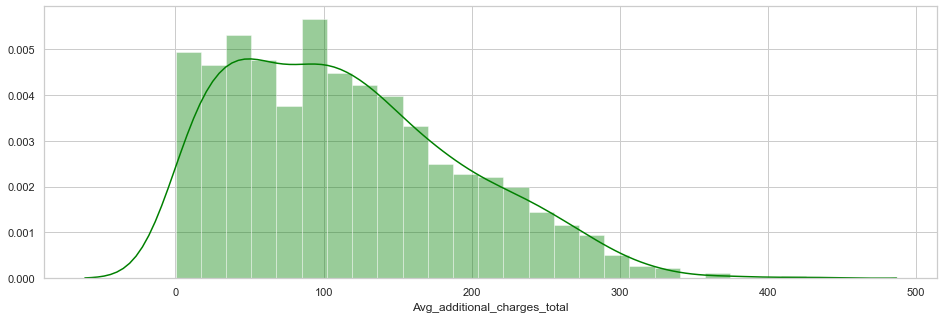

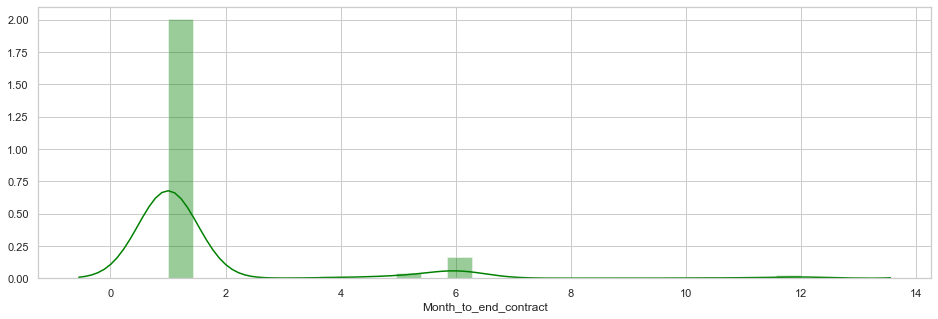

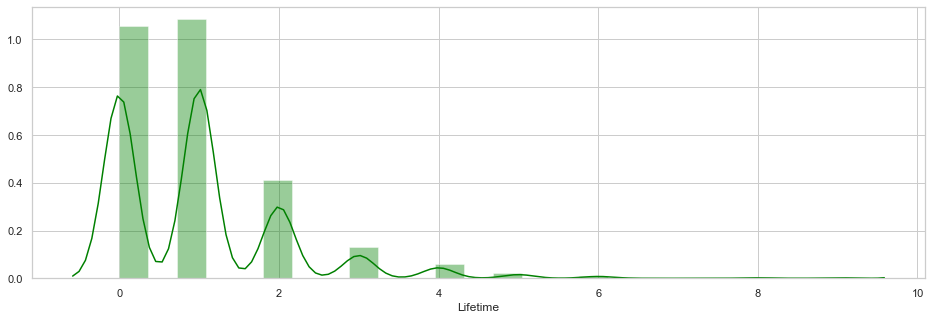

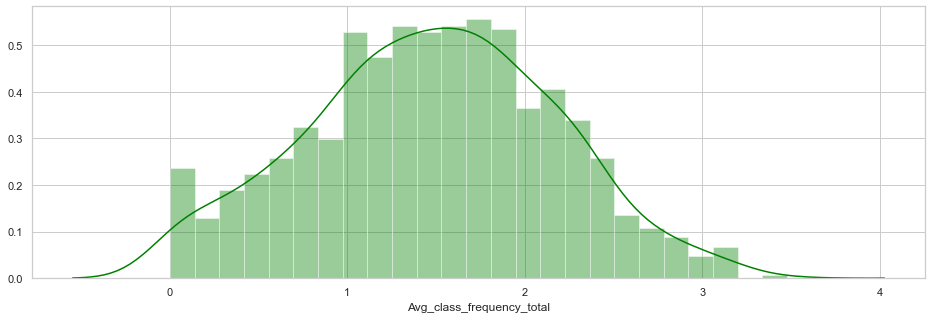

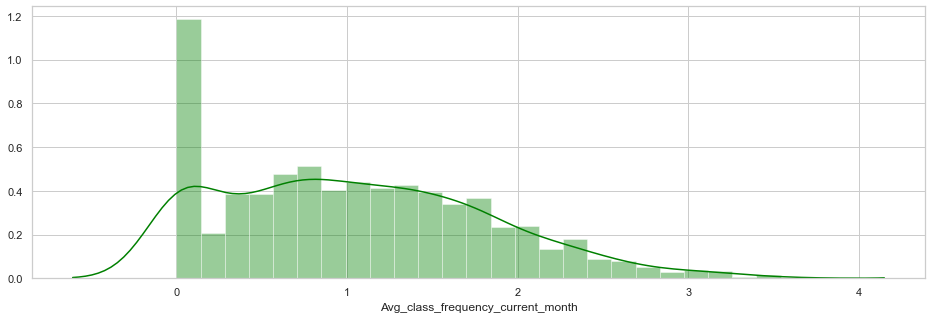

Feature distributions for those who stayed:


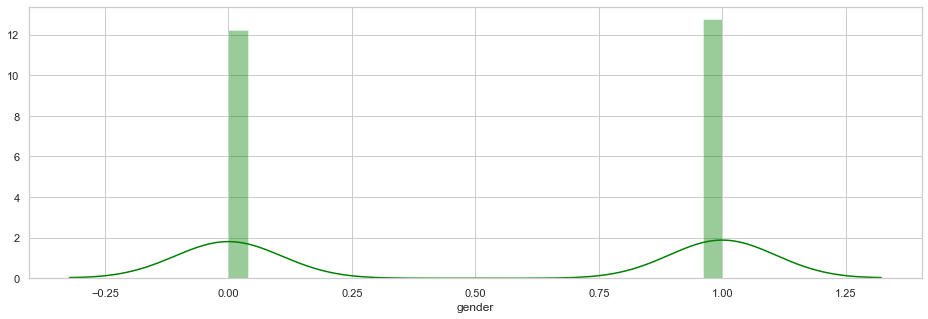

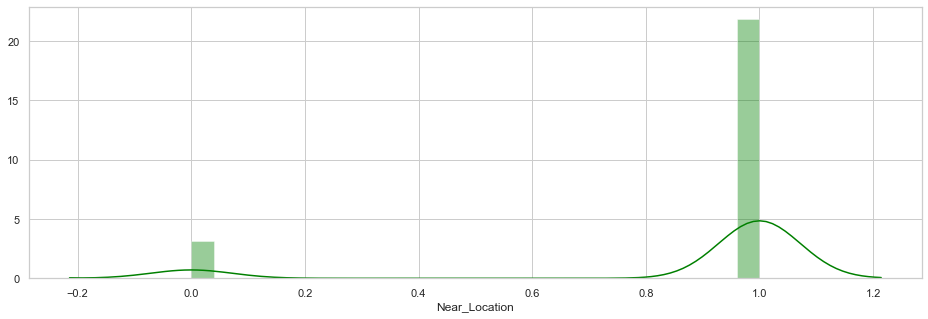

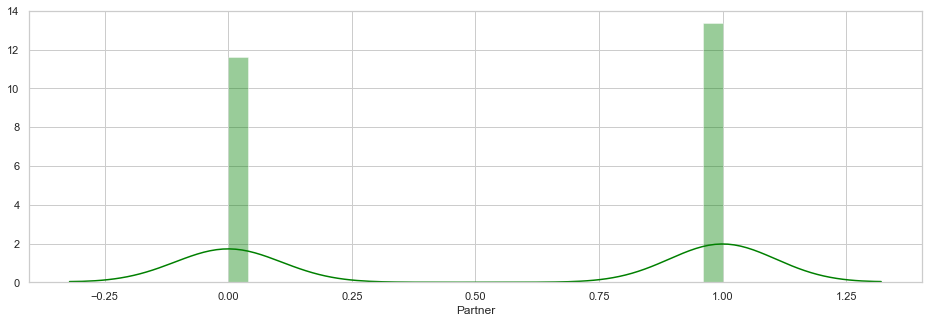

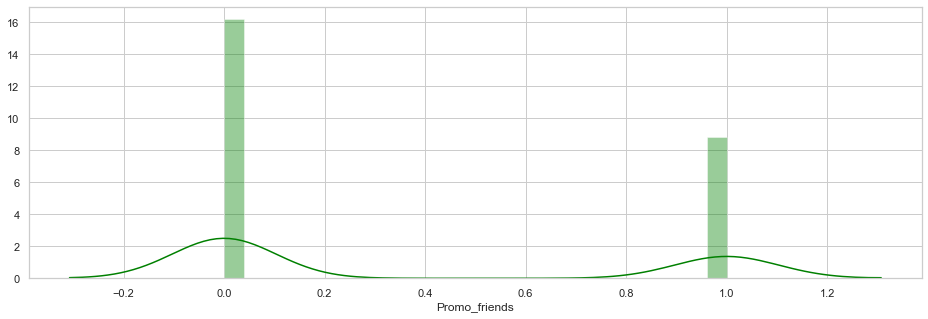

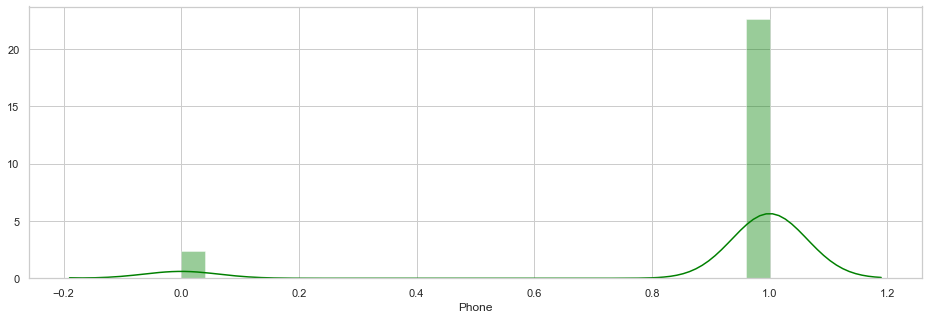

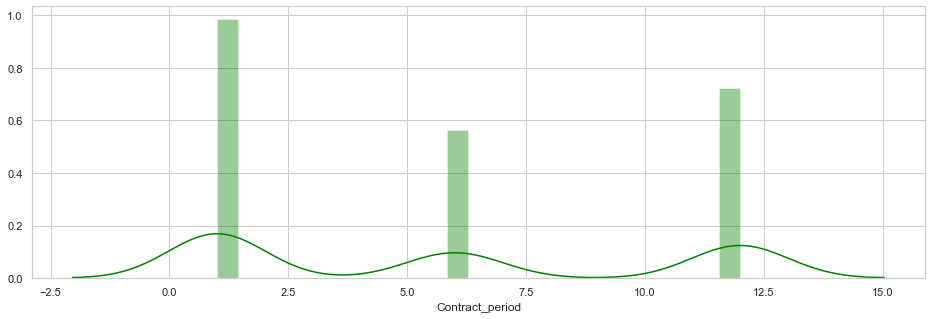

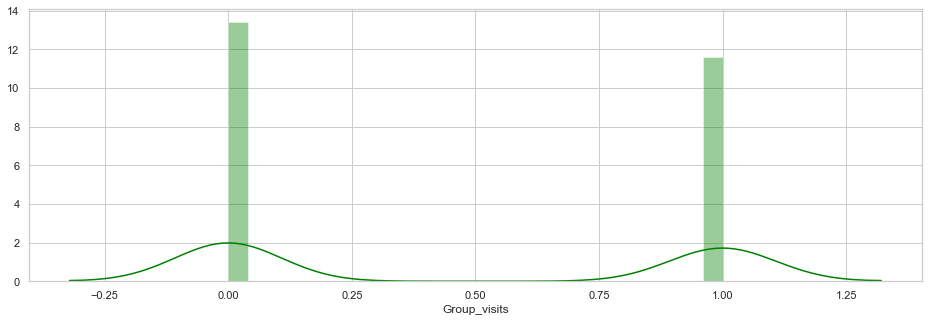

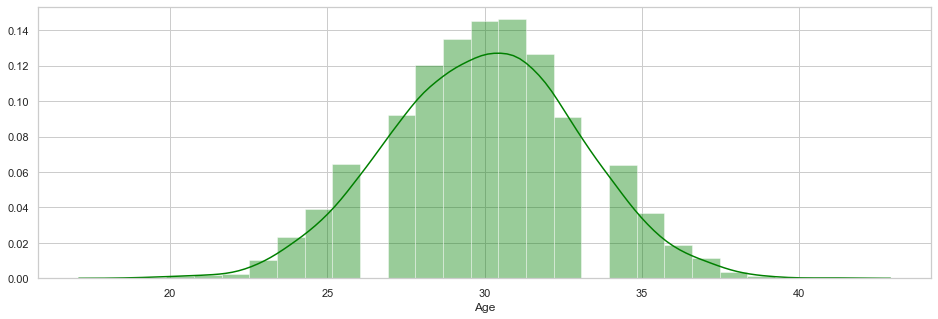

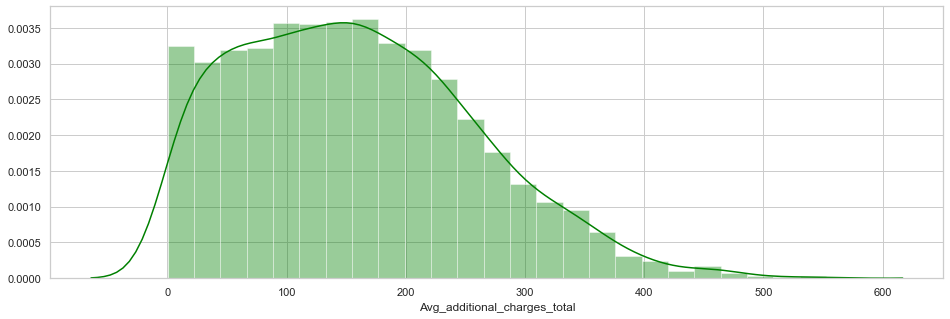

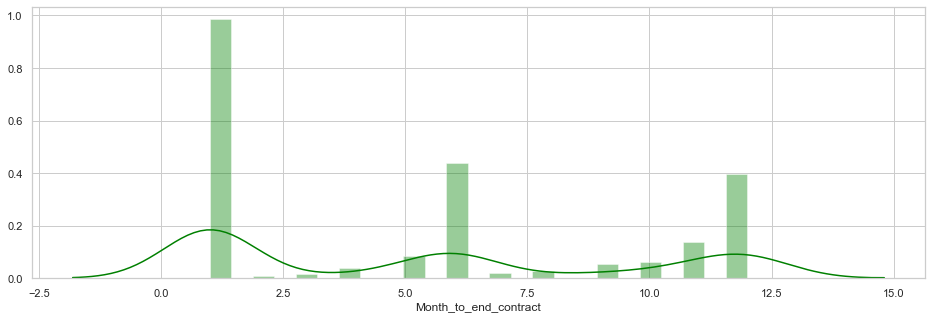

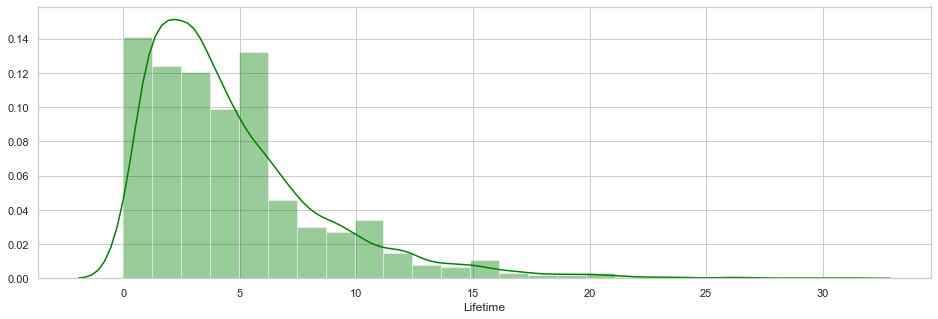

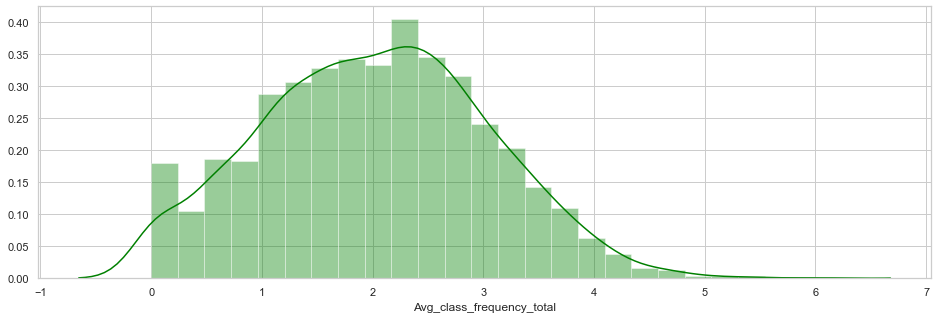

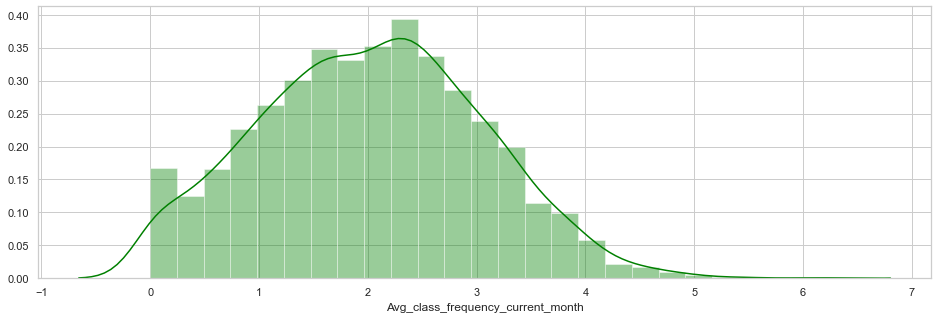

In [128]:
print('Feature distributions for those who left (churn):')
plot_features(df_data, 1)
print('Feature distributions for those who stayed:')
plot_features(df_data, 0)

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
It would be easier to compare the distributions in the two groups if you put them on the same axis or side by side
	  
</div>

> * Unfortunately, the project description does not say which gender is coded under the number 1 and 0. But among the users who stopped attending the gym, there were almost the same number of men and women. The situation is the same for those who stayed.
> * For the parameter 'Near_Location' the ratio is the same for those who left and for those who stayed. In both cases, there are more people for whom the gym is close.
> * Most of the users who left were not employees of partner companies.

- [X] Build a correlation matrix and display it.

In [129]:
corr_matrix = df_data.corr()

In [130]:
def draw_heat(df, title):
    sns.set(style='white')
    plt.figure(figsize=(18,10))
    sns.heatmap(
        df,
        annot=True,
        linecolor='green'
    )
    plt.title(title),
    plt.show()

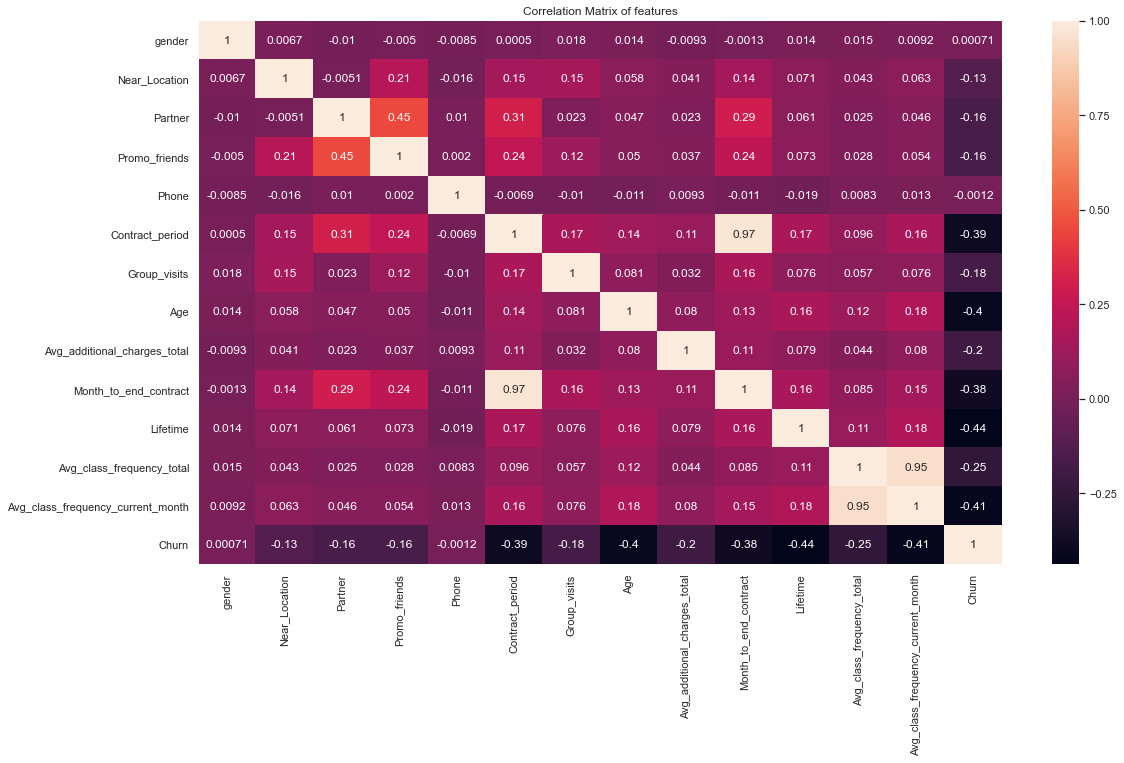

In [131]:
draw_heat(corr_matrix, 'Correlation Matrix of features')

> * The closest parameter for the churn parameter is the gender of visitors: 0.00071. 
> * The next parameters that can affect the churn are the parameter that the user left their phone number ("Phone") -0.0012 and the proximity of the fitness center ("Near_Location"): -0.13
> * The parameters are almost completely correlated with each other: (0.97-0.95)
 - the months remaining until the contract expires ('Month_to_end_contract') and 'Contract_period', 
 - average frequency of visits per week over the customer's lifetime ('Avg_class_frequency_total') and 'Avg_class_frequency_current_month'.
> * Slightly less connected: (0.45-0.29)
 - whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership) ('Promo_friends') and whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers) ('Partner). 
 - 'Partner' and 'Contract_period'

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Excellent! You explored the data and made some interesting observations
	  
</div>

#### Step 3. Build a model to predict user churn <a name="Model"></a>

- [X] Build a binary classification model for customers where the target feature is the user's leaving next month.

In [132]:
X = df_data.drop('Churn', axis=1)
y = df_data['Churn']

- [X] Divide the data into train and validation sets using the train_test_split() function.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- [X] Train the model on the train set with two methods:
> - logistic regression
> - random forest

In [134]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [135]:
LR_pred = model.predict(X_test)
LR_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [136]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [137]:
RFC_pred = model2.predict(X_test)
RFC_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [138]:
print("Accuracy of Logistic Regression =", round(accuracy_score(y_test, LR_pred), 4))
print("Precicion of Logistic Regression =", round(precision_score(y_test, LR_pred), 4))
print("Recall of Logistic Regression =", round(recall_score(y_test, LR_pred), 4))

Accuracy of Logistic Regression = 0.9262
Precicion of Logistic Regression = 0.8639
Recall of Logistic Regression = 0.8333


In [139]:
print("Accuracy of Random Forest =", round(accuracy_score(y_test, RFC_pred), 4))
print("Precicion of Random Forest =", round(precision_score(y_test, RFC_pred), 4))
print("Recall of Random Forest =", round(recall_score(y_test, RFC_pred), 4))

Accuracy of Random Forest = 0.9162
Precicion of Random Forest = 0.8394
Recall of Random Forest = 0.8182


> * More 

<div class="alert alert-danger">
<b>Reviewer's comment</b>
	  
The data was split into train and test sets, the models were trained and evaluated correctly. The conclusion abruptly ends on the first word for some reason (maybe the notebook didn't save correctly). Could you please restore it?
	  
</div>

#### Step 4. Create user cluster <a name="UserCluster"></a>

- [X] Standardize the data.

In [140]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

- [X] Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

In [141]:
distance_matrix = linkage(X_sc, method="ward")
distance_matrix

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

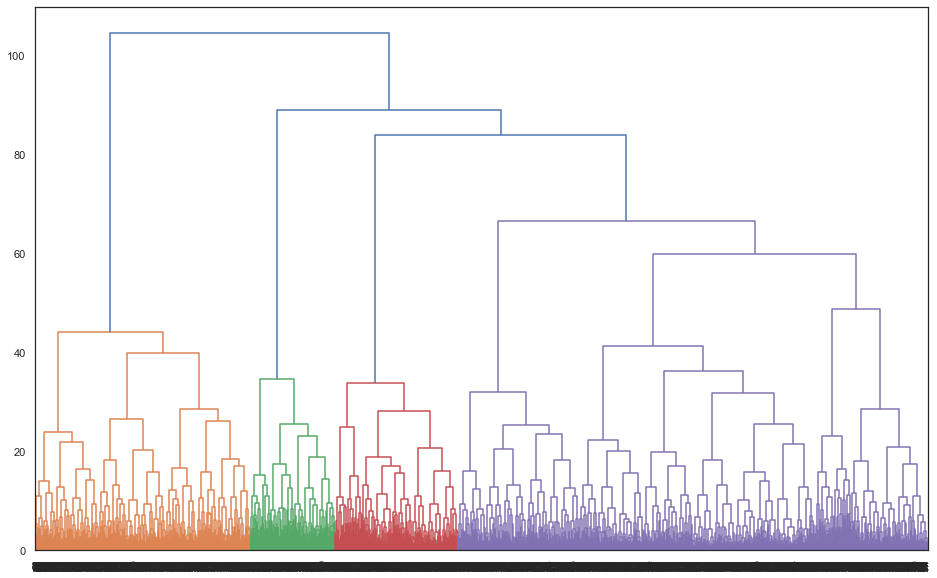

In [142]:
plt.figure(figsize=(16,10))
dendrogram(distance_matrix, orientation='top')
plt.show()

- [X] Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

In [143]:
K_means = KMeans(n_clusters=5, random_state=0)
labels = K_means.fit_predict(X_sc)
labels

array([1, 0, 3, ..., 0, 0, 1])

- [X] Look at the mean feature values for clusters. Does anything catch your eye?

In [144]:
df_data['km_cluster'] = labels
df_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,km_cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [145]:
clusters_features = df_data.groupby(['km_cluster']).mean()
clusters_features.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
km_cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


> * Based on dataframe ...

<div class="alert alert-danger">
<b>Reviewer's comment</b>
	  
The conclusion breaks off for some reason
	  
</div>

- [X] Plot distributions of features for the clusters. Do you notice anything?

Feature distributions for those who left (churn):


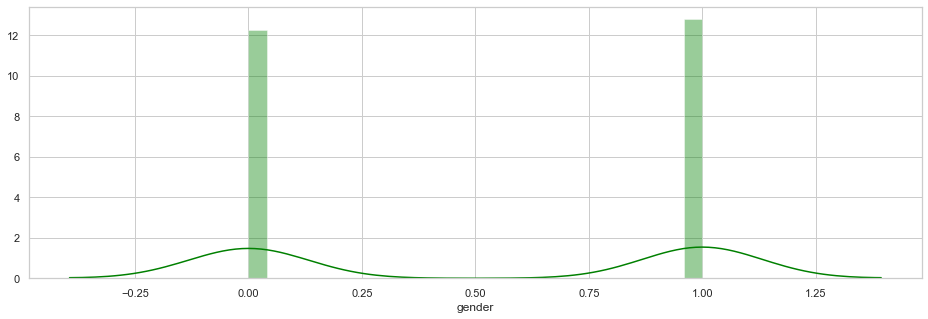

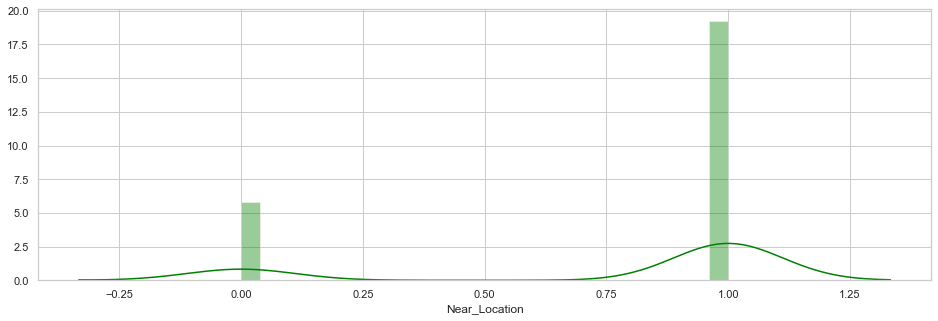

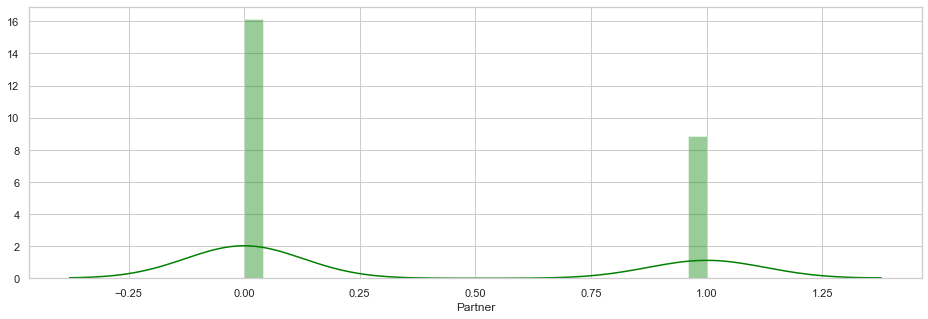

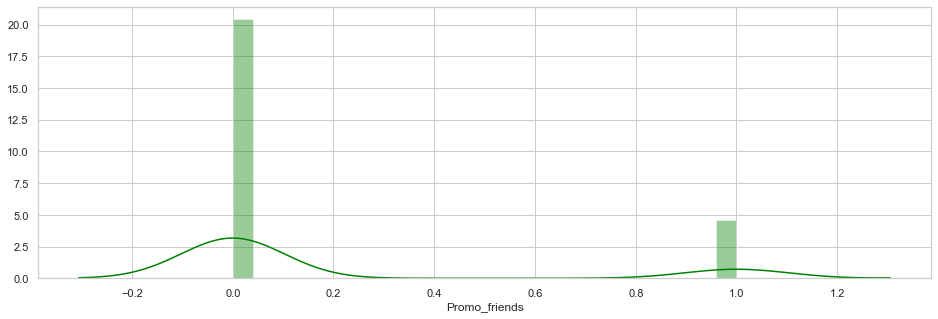

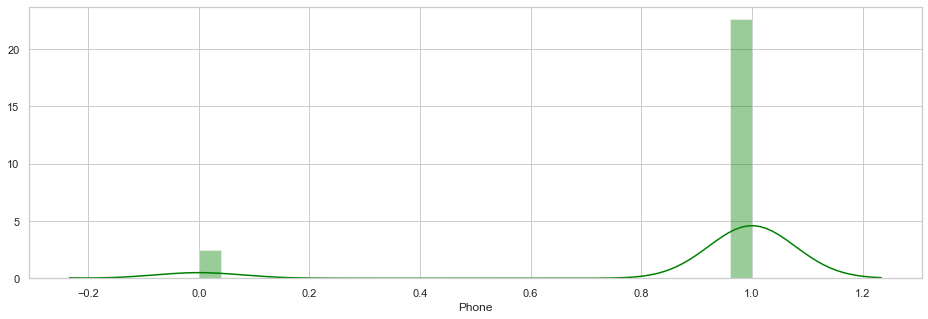

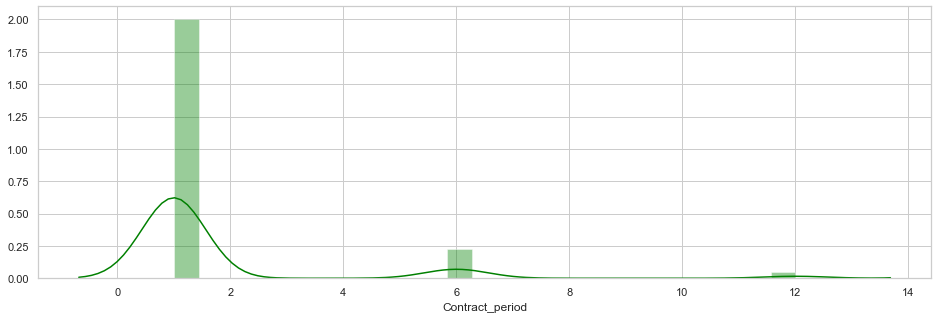

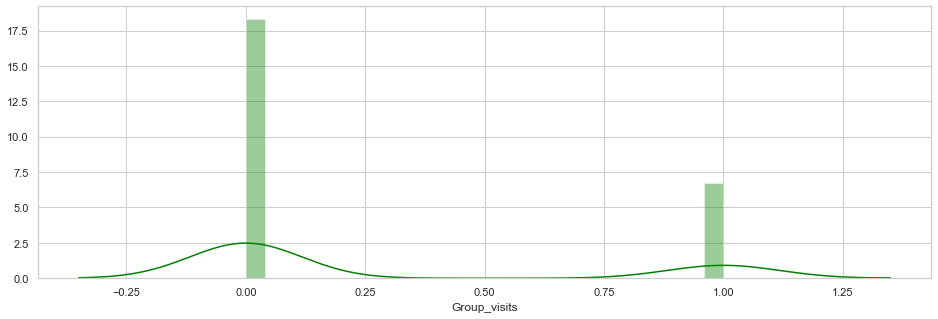

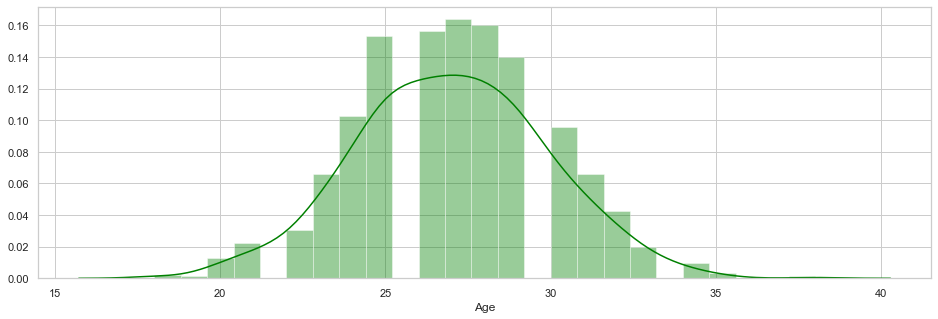

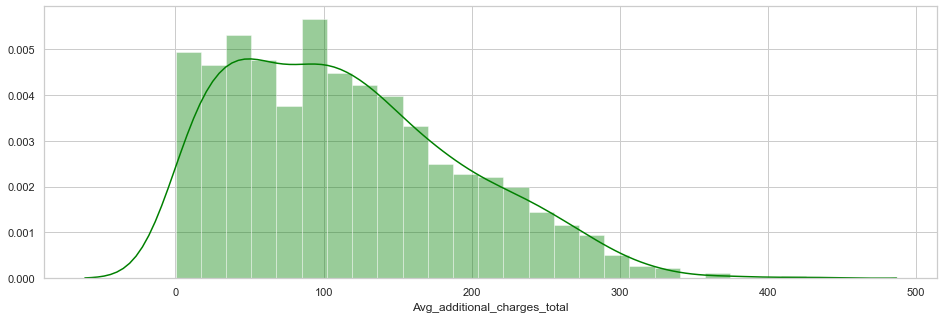

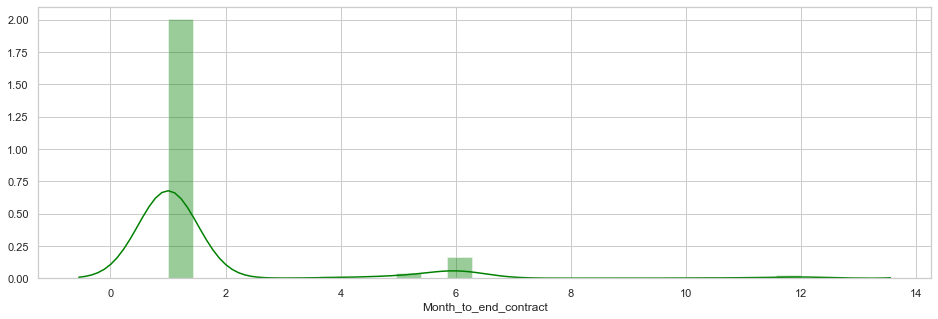

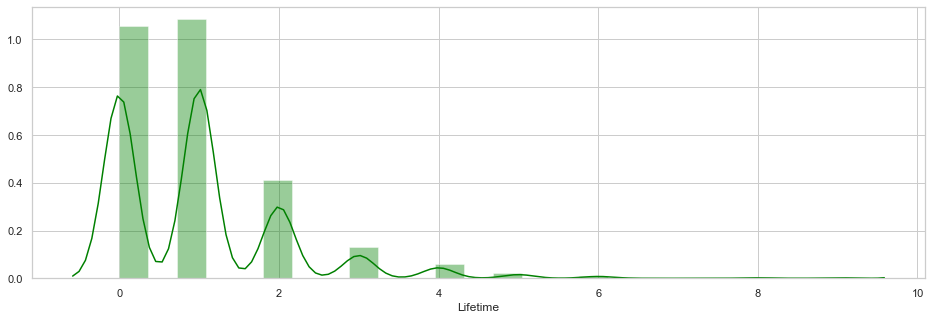

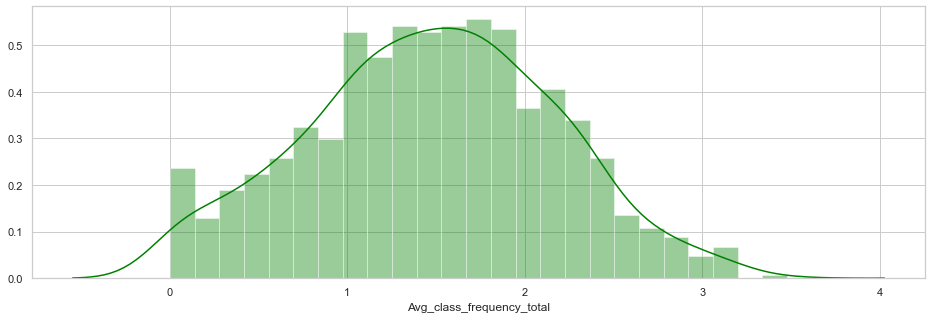

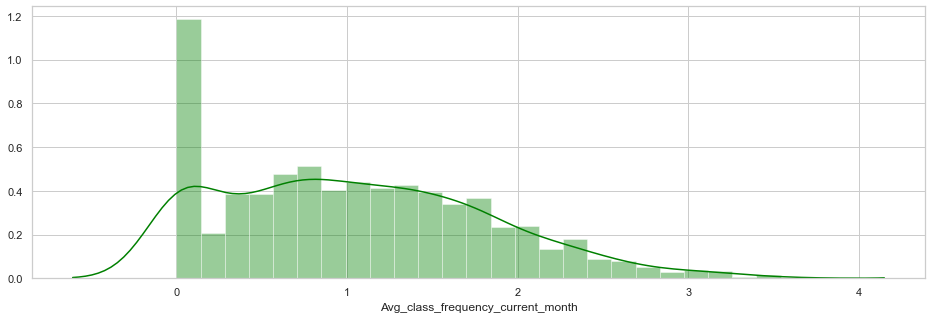

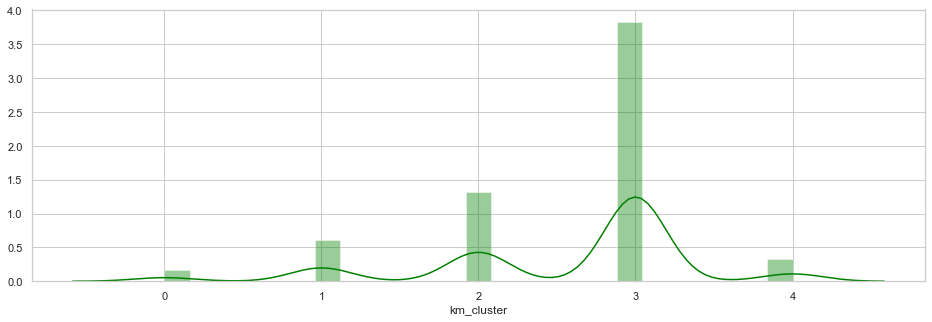

Feature distributions for those who stayed:


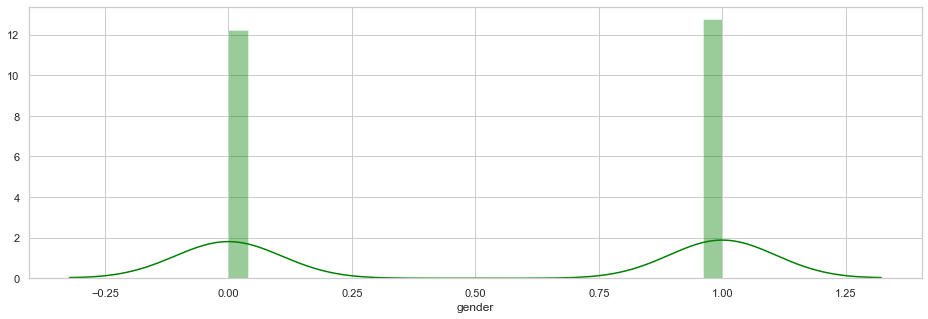

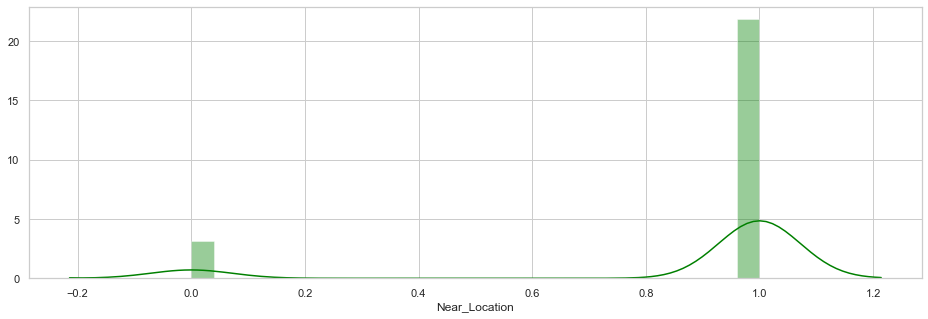

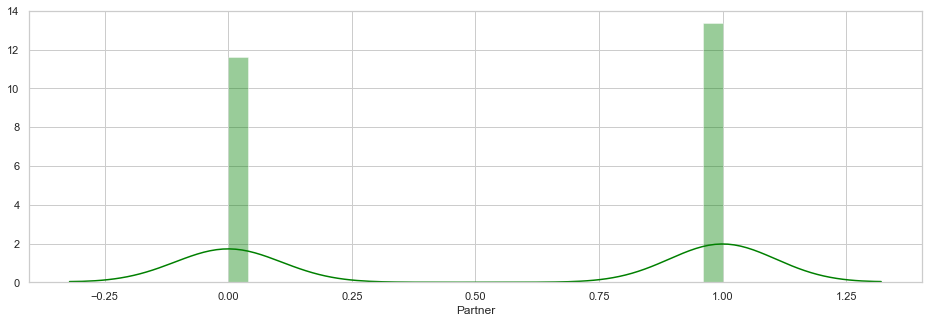

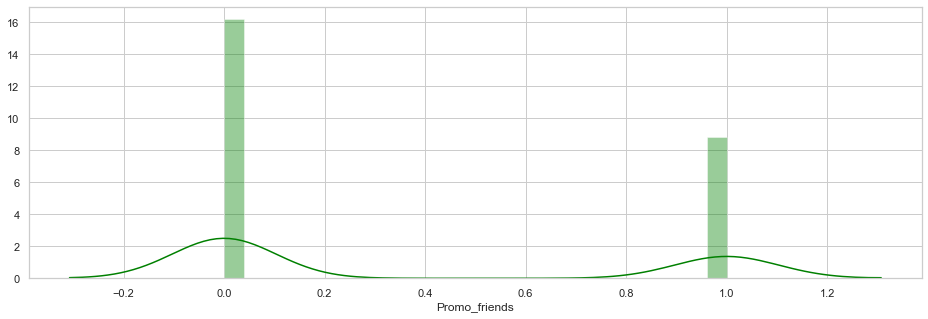

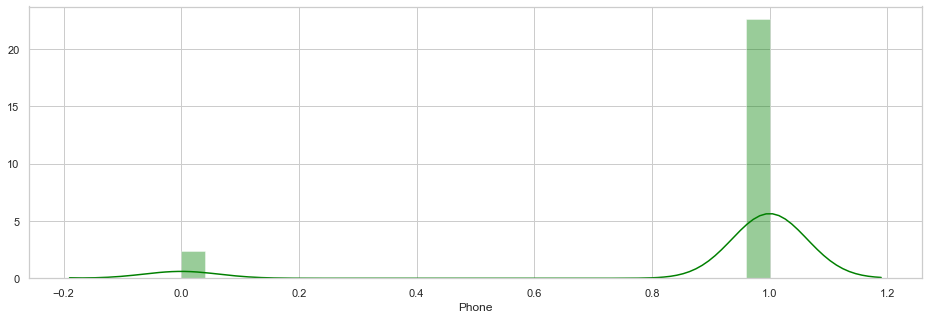

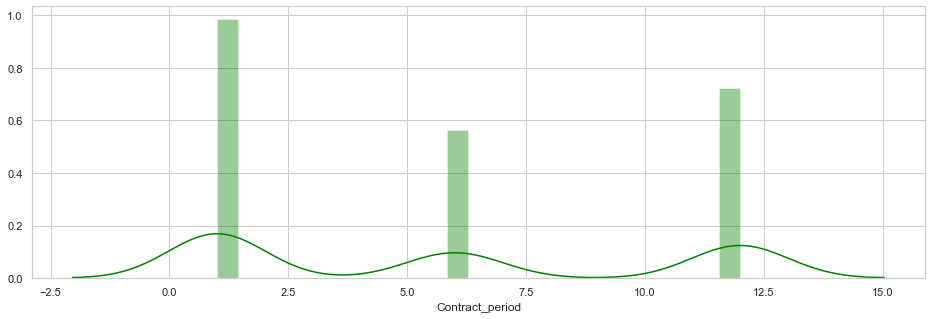

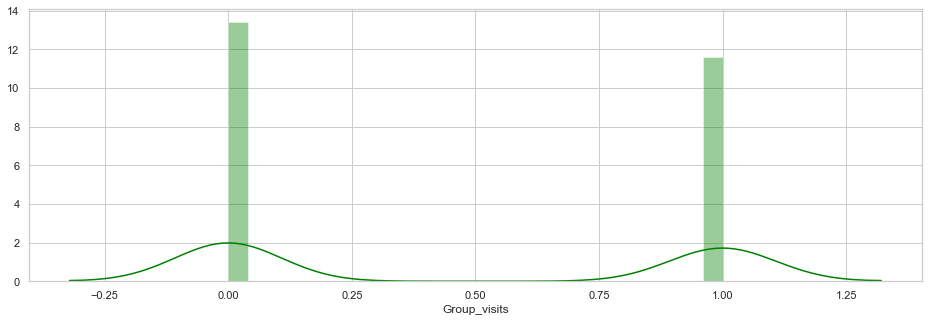

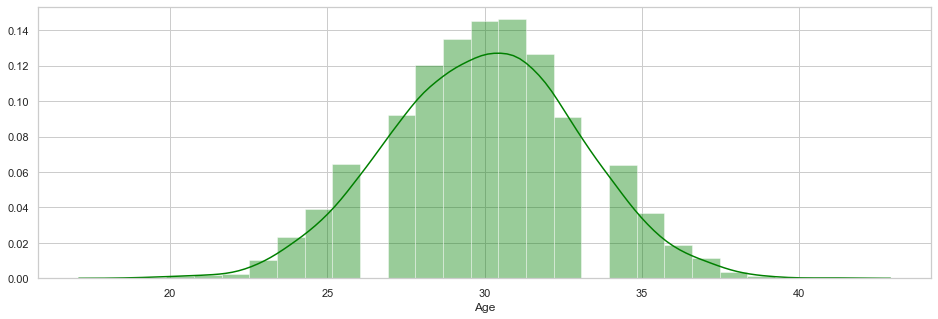

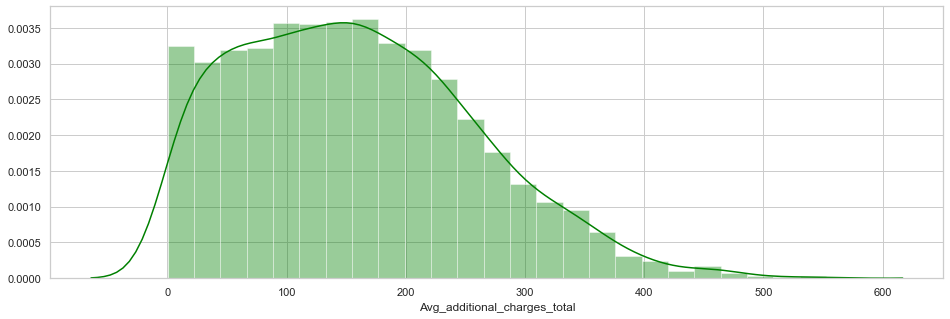

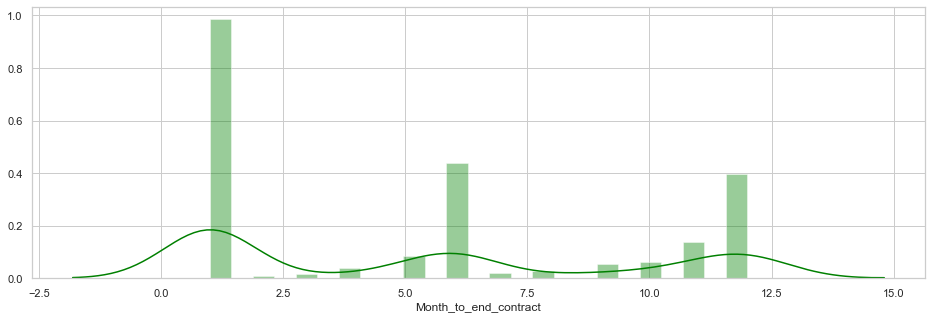

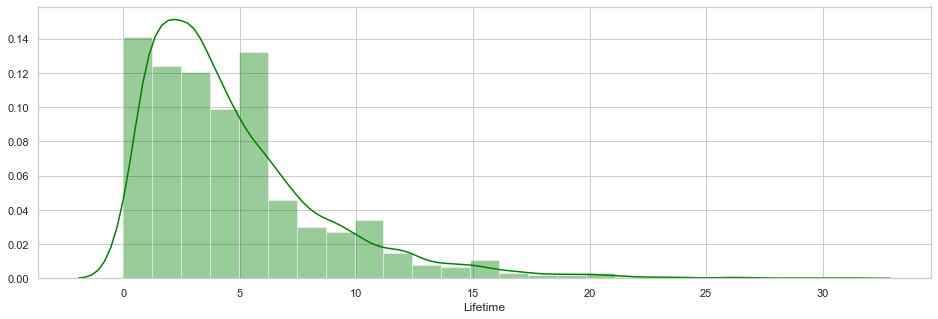

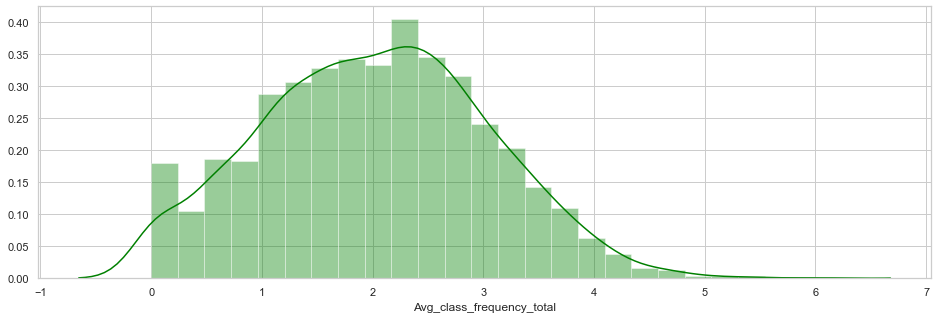

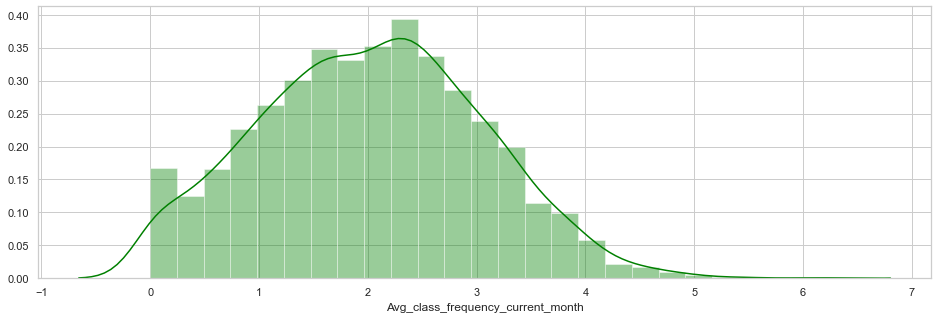

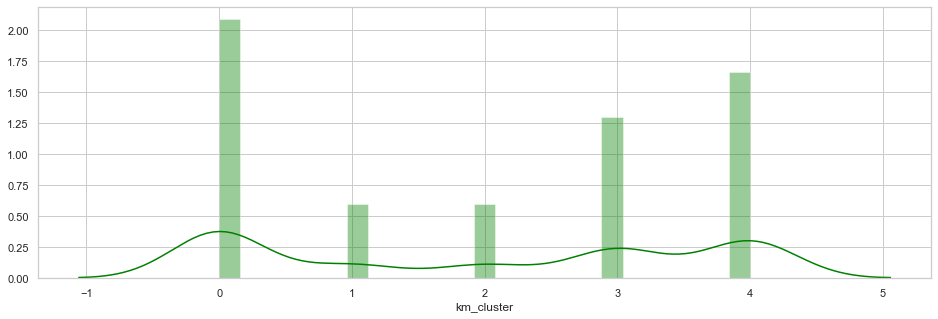

In [146]:
print('Feature distributions for those who left (churn):')
plot_features(df_data, 1)
print('Feature distributions for those who stayed:')
plot_features(df_data, 0)

<div class="alert alert-danger">
<b>Reviewer's comment</b>
	  
These are the same plots as in the EDA section, where the data is grouped by churn, but in this task you are supposed to use the grouping by cluster instead
	  
</div>

- [X] Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [66]:
df_data.groupby(['km_cluster'])['Churn'].value_counts(normalize=True)

km_cluster  Churn
0           0        0.972277
            1        0.027723
1           0        0.732468
            1        0.267532
2           0        0.556436
            1        0.443564
3           1        0.514263
            0        0.485737
4           0        0.931981
            1        0.068019
Name: Churn, dtype: float64

> * Based on these data, we can see that in the 1st and 3rd clusters, the number of people who are loyal to the fitness center is more than 95 percent.
> * The next is cluster number 4, with 73 percent of people who did not leave, cluster 0 with 60 percent of people who continue to visit the fitness center. And almost half and half (55/45) in cluster 2.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Ok, you identified the clusters and studied them a bit. It's great that you set the random_state parameter of KMeans, so your research is reproducible!
	  
</div>

#### Step 5. Come up with conclusions and basic recommendations on working with customers <a name="Conclusion"></a>

   Based on the previous data, the following conclusions can be drawn.
> * 

<div class="alert alert-danger">
<b>Reviewer's comment</b>
	  
The final conclusion and recommendations are missing
	  
</div>